In [132]:
import pandas as pd
import numpy as np
import arff
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [76]:

with open('dataset', 'r', encoding='utf-8') as f:
    dataset = arff.load(f)


df = pd.DataFrame(dataset['data'], columns=[a[0] for a in dataset['attributes']])

## Data analysis

In [77]:
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,class
0,1,3,7,4,41,2,17,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,5,1,1,3,64,0,10,0,0,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,2,1,1,2,39,0,8,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,3,1,1,1,39,2,12,0,0,1,...,No,No,No,No,No,No,No,No,No,NO
4,3,1,1,3,21,2,23,1,0,0,...,No,No,No,No,No,No,No,Ch,Yes,NO


In [78]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   admission_type_id         101766 non-null  int64 
 1   discharge_disposition_id  101766 non-null  int64 
 2   admission_source_id       101766 non-null  int64 
 3   time_in_hospital          101766 non-null  int64 
 4   num_lab_procedures        101766 non-null  int64 
 5   num_procedures            101766 non-null  int64 
 6   num_medications           101766 non-null  int64 
 7   number_outpatient         101766 non-null  int64 
 8   number_emergency          101766 non-null  int64 
 9   number_inpatient          101766 non-null  int64 
 10  number_diagnoses          101766 non-null  int64 
 11  race                      99493 non-null   object
 12  gender                    101766 non-null  object
 13  age                       101766 non-null  object
 14  weig

In [80]:
null_count = df.isnull().sum()
print(null_count)

admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
race                         2273
gender                          0
age                             0
weight                      98569
payer_code                  40256
medical_specialty           49949
diag_1                         21
diag_2                        358
diag_3                       1423
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [81]:
numeric_val = df.select_dtypes(include=np.number)
object_val = df.select_dtypes(include='object')

In [82]:
numeric_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   admission_type_id         101766 non-null  int64
 1   discharge_disposition_id  101766 non-null  int64
 2   admission_source_id       101766 non-null  int64
 3   time_in_hospital          101766 non-null  int64
 4   num_lab_procedures        101766 non-null  int64
 5   num_procedures            101766 non-null  int64
 6   num_medications           101766 non-null  int64
 7   number_outpatient         101766 non-null  int64
 8   number_emergency          101766 non-null  int64
 9   number_inpatient          101766 non-null  int64
 10  number_diagnoses          101766 non-null  int64
dtypes: int64(11)
memory usage: 8.5 MB


In [83]:
object_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   payer_code                61510 non-null   object
 5   medical_specialty         51817 non-null   object
 6   diag_1                    101745 non-null  object
 7   diag_2                    101408 non-null  object
 8   diag_3                    100343 non-null  object
 9   max_glu_serum             101766 non-null  object
 10  A1Cresult                 101766 non-null  object
 11  metformin                 101766 non-null  object
 12  repaglinide               101766 non-null  object
 13  nateglinide               101766 non-null  object
 14  chlo

- During data analysis, we found that our dataset has dimensions of 191766 rows and 48 columns

- The column types were numeric and object. There was not a single non-null value in the numeric columns (10 columns). There were more such columns in the object columns (other columns)

## Data preprocessing and normalization

In [84]:
def interval_to_mean(value):
    """Function from interval fo format [...) returns mean of two numbers"""
    parts = value.replace('[', '').replace(']', '').replace('(', '').replace(')', '').split('-')
    if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
        return (int(parts[0]) + int(parts[1])) / 2
    

In [85]:
null_percent = (null_count / len(df)) * 100
cols_over_30 = null_percent[null_percent > 30]
cols_to_drop = cols_over_30.index.tolist()
df = df.drop(cols_to_drop, axis='columns')

- removing columns that have more than 30% NaN values

In [86]:
df = df.drop_duplicates()

- removing duplicates

In [87]:
df['age'] = df['age'].apply(interval_to_mean)
df.loc[(df['age'] < 0) | (df['age'] > 110), 'age'] = np.nan
df['age'] = df['age'].fillna(0)

- normalizing the $age$ column to the mean of the interval

In [88]:
numeric_col: list[str] = df.select_dtypes(include='number').columns # type: ignore

In [89]:
for col in df.select_dtypes(include='object').columns:
    converted = pd.to_numeric(df[col], errors='coerce')
    
    if converted.notna().mean() > 0.5:
        df[col] = converted


- if a column has more than 50% numeric values, then the column should be of type numeric and not object

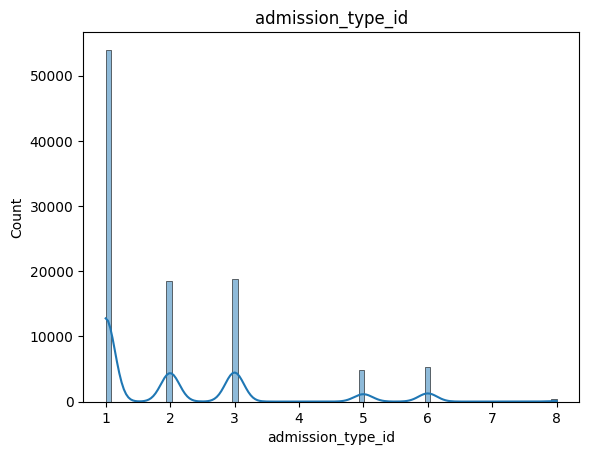

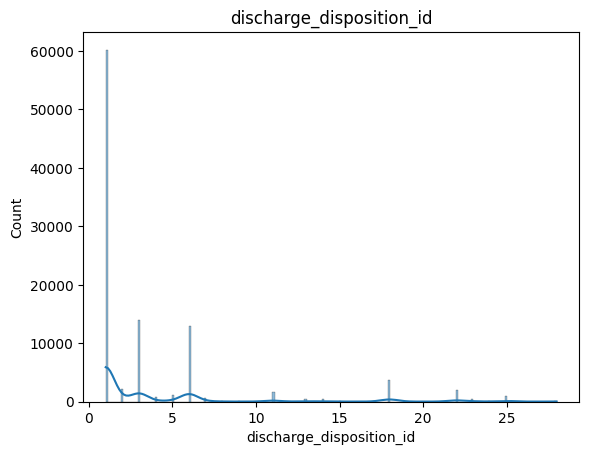

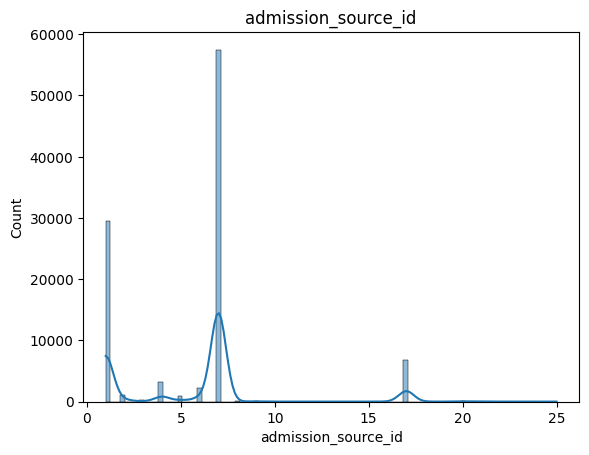

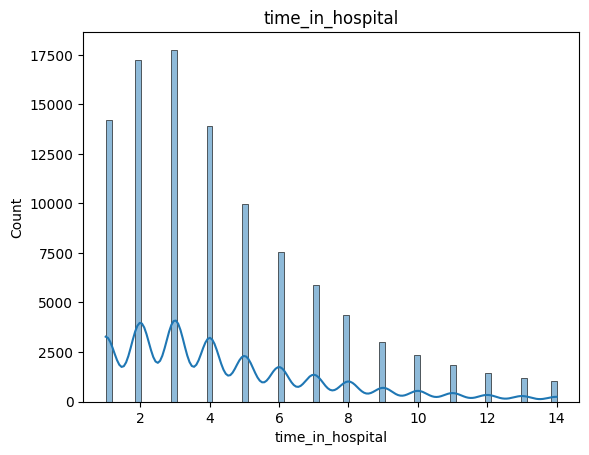

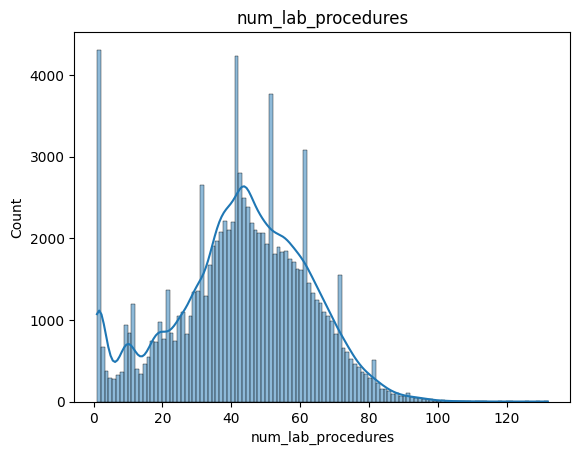

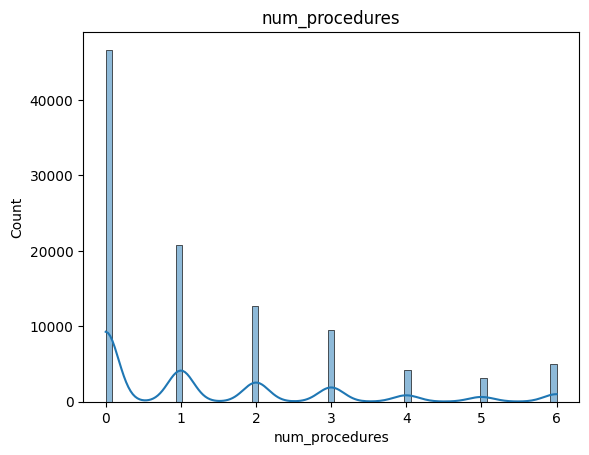

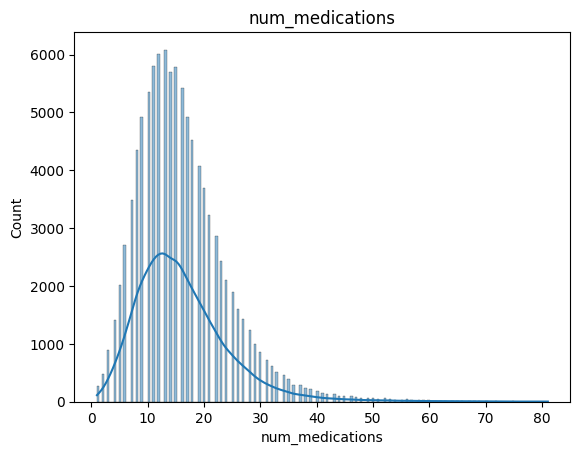

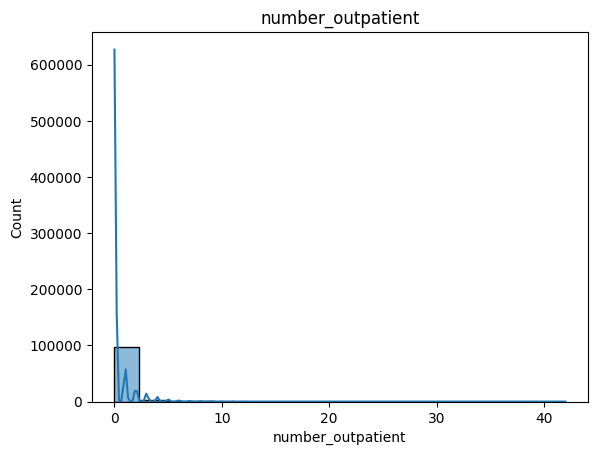

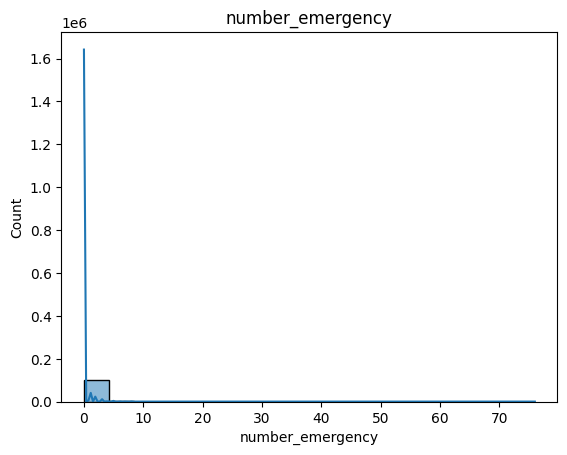

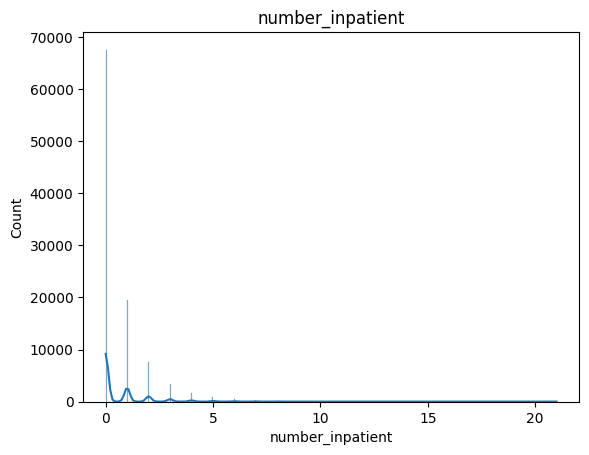

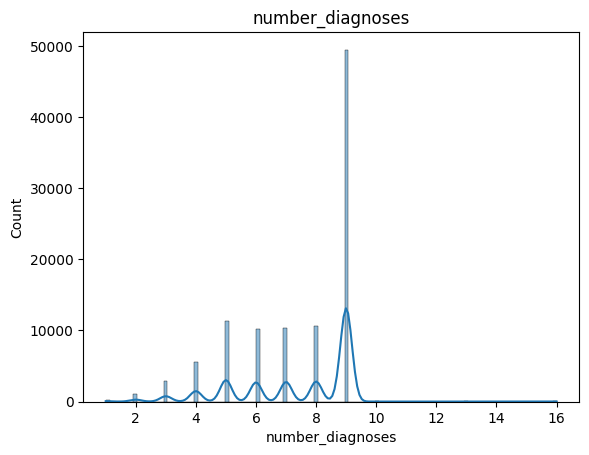

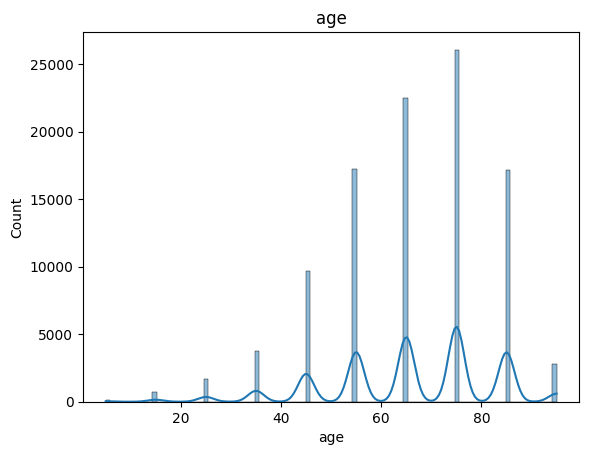

In [90]:
for col in numeric_col:
    sns.histplot(data=df[col], kde=True) # type: ignore
    plt.title(col)
    plt.show()

In [91]:
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    iqr = Q3 - Q1
    lower_b = Q1 - 1.5 * iqr
    upper_b = Q3 + 1.5 * iqr
    
    df.loc[(df[col] < lower_b) | (df[col] > upper_b), col] = np.nan
    df[col] = df[col].fillna(df[col].median())
    df[col] = np.log1p(df[col])

- re-format outlayers using log transformation

<Axes: >

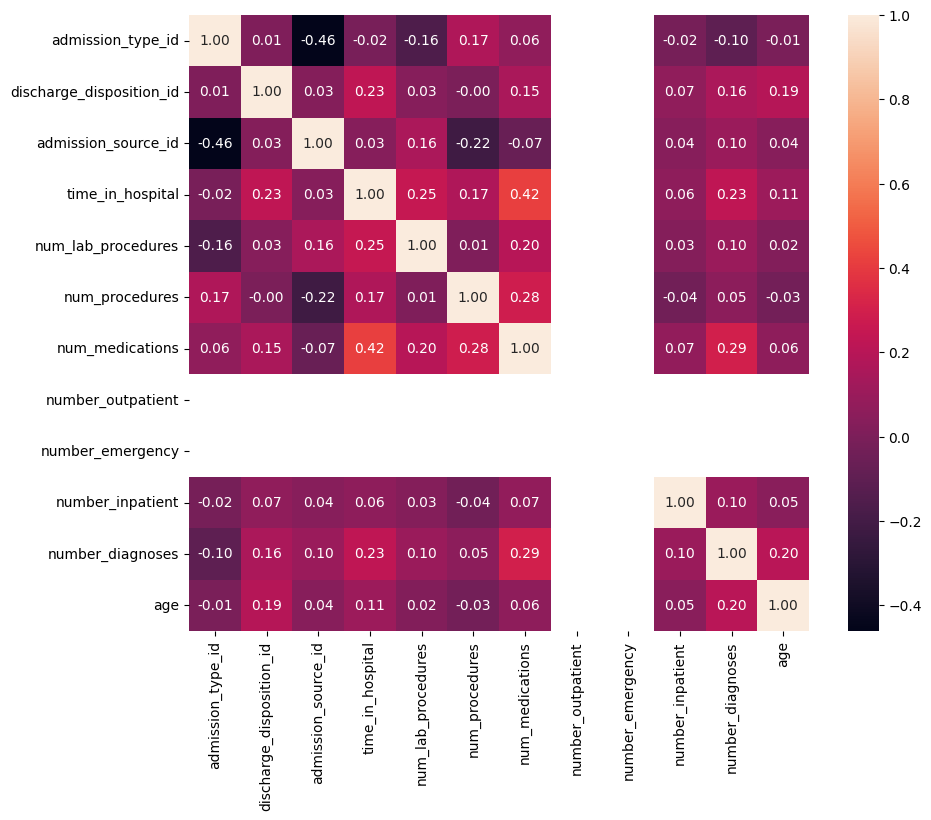

In [92]:
plt.figure(figsize=(10, 8))

sns.heatmap(data=df[numeric_col].corr(),
            cmap="rocket",
            annot=True,
            fmt=".2f"
            )


- on the heatmap we can see that two columns have no values, it is necessary to investigate this further, possibly remove the column

In [93]:
df['number_outpatient'].nunique() == 1

True

In [94]:
df['number_emergency'].nunique() == 1

True

In [95]:
df = df.drop(["number_emergency", "number_outpatient"], axis="columns")

- we removed the columns (number_emergency, number_outpatient) because they only had the value 0

In [96]:
df = df.drop(["admission_type_id", "discharge_disposition_id", "admission_source_id"], axis="columns")

In [97]:
numeric_col: list[str] = df.select_dtypes(include='number').columns # type: ignore

<Axes: >

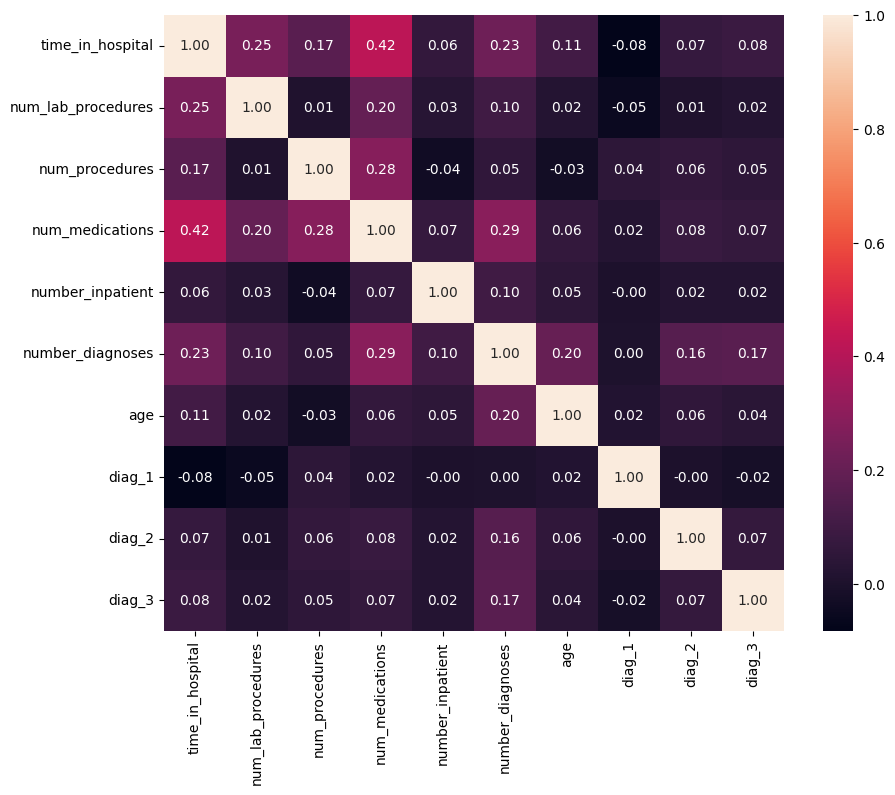

In [98]:
plt.figure(figsize=(10, 8))

sns.heatmap(data=df[numeric_col].corr(),
            cmap="rocket",
            annot=True,
            fmt=".2f"
            )


In [99]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

race: ['AfricanAmerican' 'Caucasian' 'Hispanic' 'Other' None 'Asian']
gender: ['Female' 'Male' 'Unknown/Invalid']
max_glu_serum: ['None' 'Norm' '>300' '>200']
A1Cresult: ['None' '>8' '>7' 'Norm']
metformin: ['No' 'Steady' 'Down' 'Up']
repaglinide: ['No' 'Steady' 'Up' 'Down']
nateglinide: ['No' 'Steady' 'Down' 'Up']
chlorpropamide: ['No' 'Steady' 'Up' 'Down']
glimepiride: ['No' 'Steady' 'Down' 'Up']
acetohexamide: ['No' 'Steady']
glipizide: ['Steady' 'No' 'Up' 'Down']
glyburide: ['No' 'Steady' 'Up' 'Down']
tolbutamide: ['No' 'Steady']
pioglitazone: ['No' 'Steady' 'Up' 'Down']
rosiglitazone: ['No' 'Steady' 'Down' 'Up']
acarbose: ['No' 'Steady' 'Down' 'Up']
miglitol: ['No' 'Steady' 'Up' 'Down']
troglitazone: ['No' 'Steady']
tolazamide: ['No' 'Steady' 'Up']
examide: ['No']
citoglipton: ['No']
insulin: ['Steady' 'No' 'Down' 'Up']
glyburide.metformin: ['No' 'Steady' 'Down' 'Up']
glipizide.metformin: ['No' 'Steady']
glimepiride.pioglitazone: ['No' 'Steady']
metformin.rosiglitazone: ['No' 'Ste

In [100]:
df = df.drop(["examide", "citoglipton"], axis="columns") # mali len hodnotu "NO"

In [101]:
ordinal_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'insulin', 'glyburide.metformin', 'glipizide.metformin',
    'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone'
]

nominal_cols = ['race', 'gender', 'change', 'diabetesMed']

In [102]:
df['class'] = df['class'].map({'>30':0,
                               '<30':1,
                               'NO':2})

In [103]:
mapping_general = {'No': 0, 
                   'Steady': 1, 
                   'Down': 2, 
                   'Up': 3
                   }
mapping_max_glu_serum = {'None': 0, 
                         'Norm': 1,
                         '>200': 2,
                         '>300': 3
                         }
mapping_A1Cresult = {'None': 0,
                     'Norm': 1,
                     '>7': 2,
                     '>8': 3
                     }

In [104]:
df["race"] = df["race"].fillna("Unknown")

In [105]:
df["max_glu_serum"] = df["max_glu_serum"].map(mapping_max_glu_serum)
df["A1Cresult"] = df["A1Cresult"].map(mapping_A1Cresult)

for col in ordinal_cols:
    df[col] = df[col].map(mapping_general)

df = pd.get_dummies(df, 
                    columns=nominal_cols, 
                    drop_first=False
                    )

In [106]:
for col in ["diag_1", "diag_2", "diag_3"]:
    df[col] = df[col].fillna(df[col].mean())

In [107]:
for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

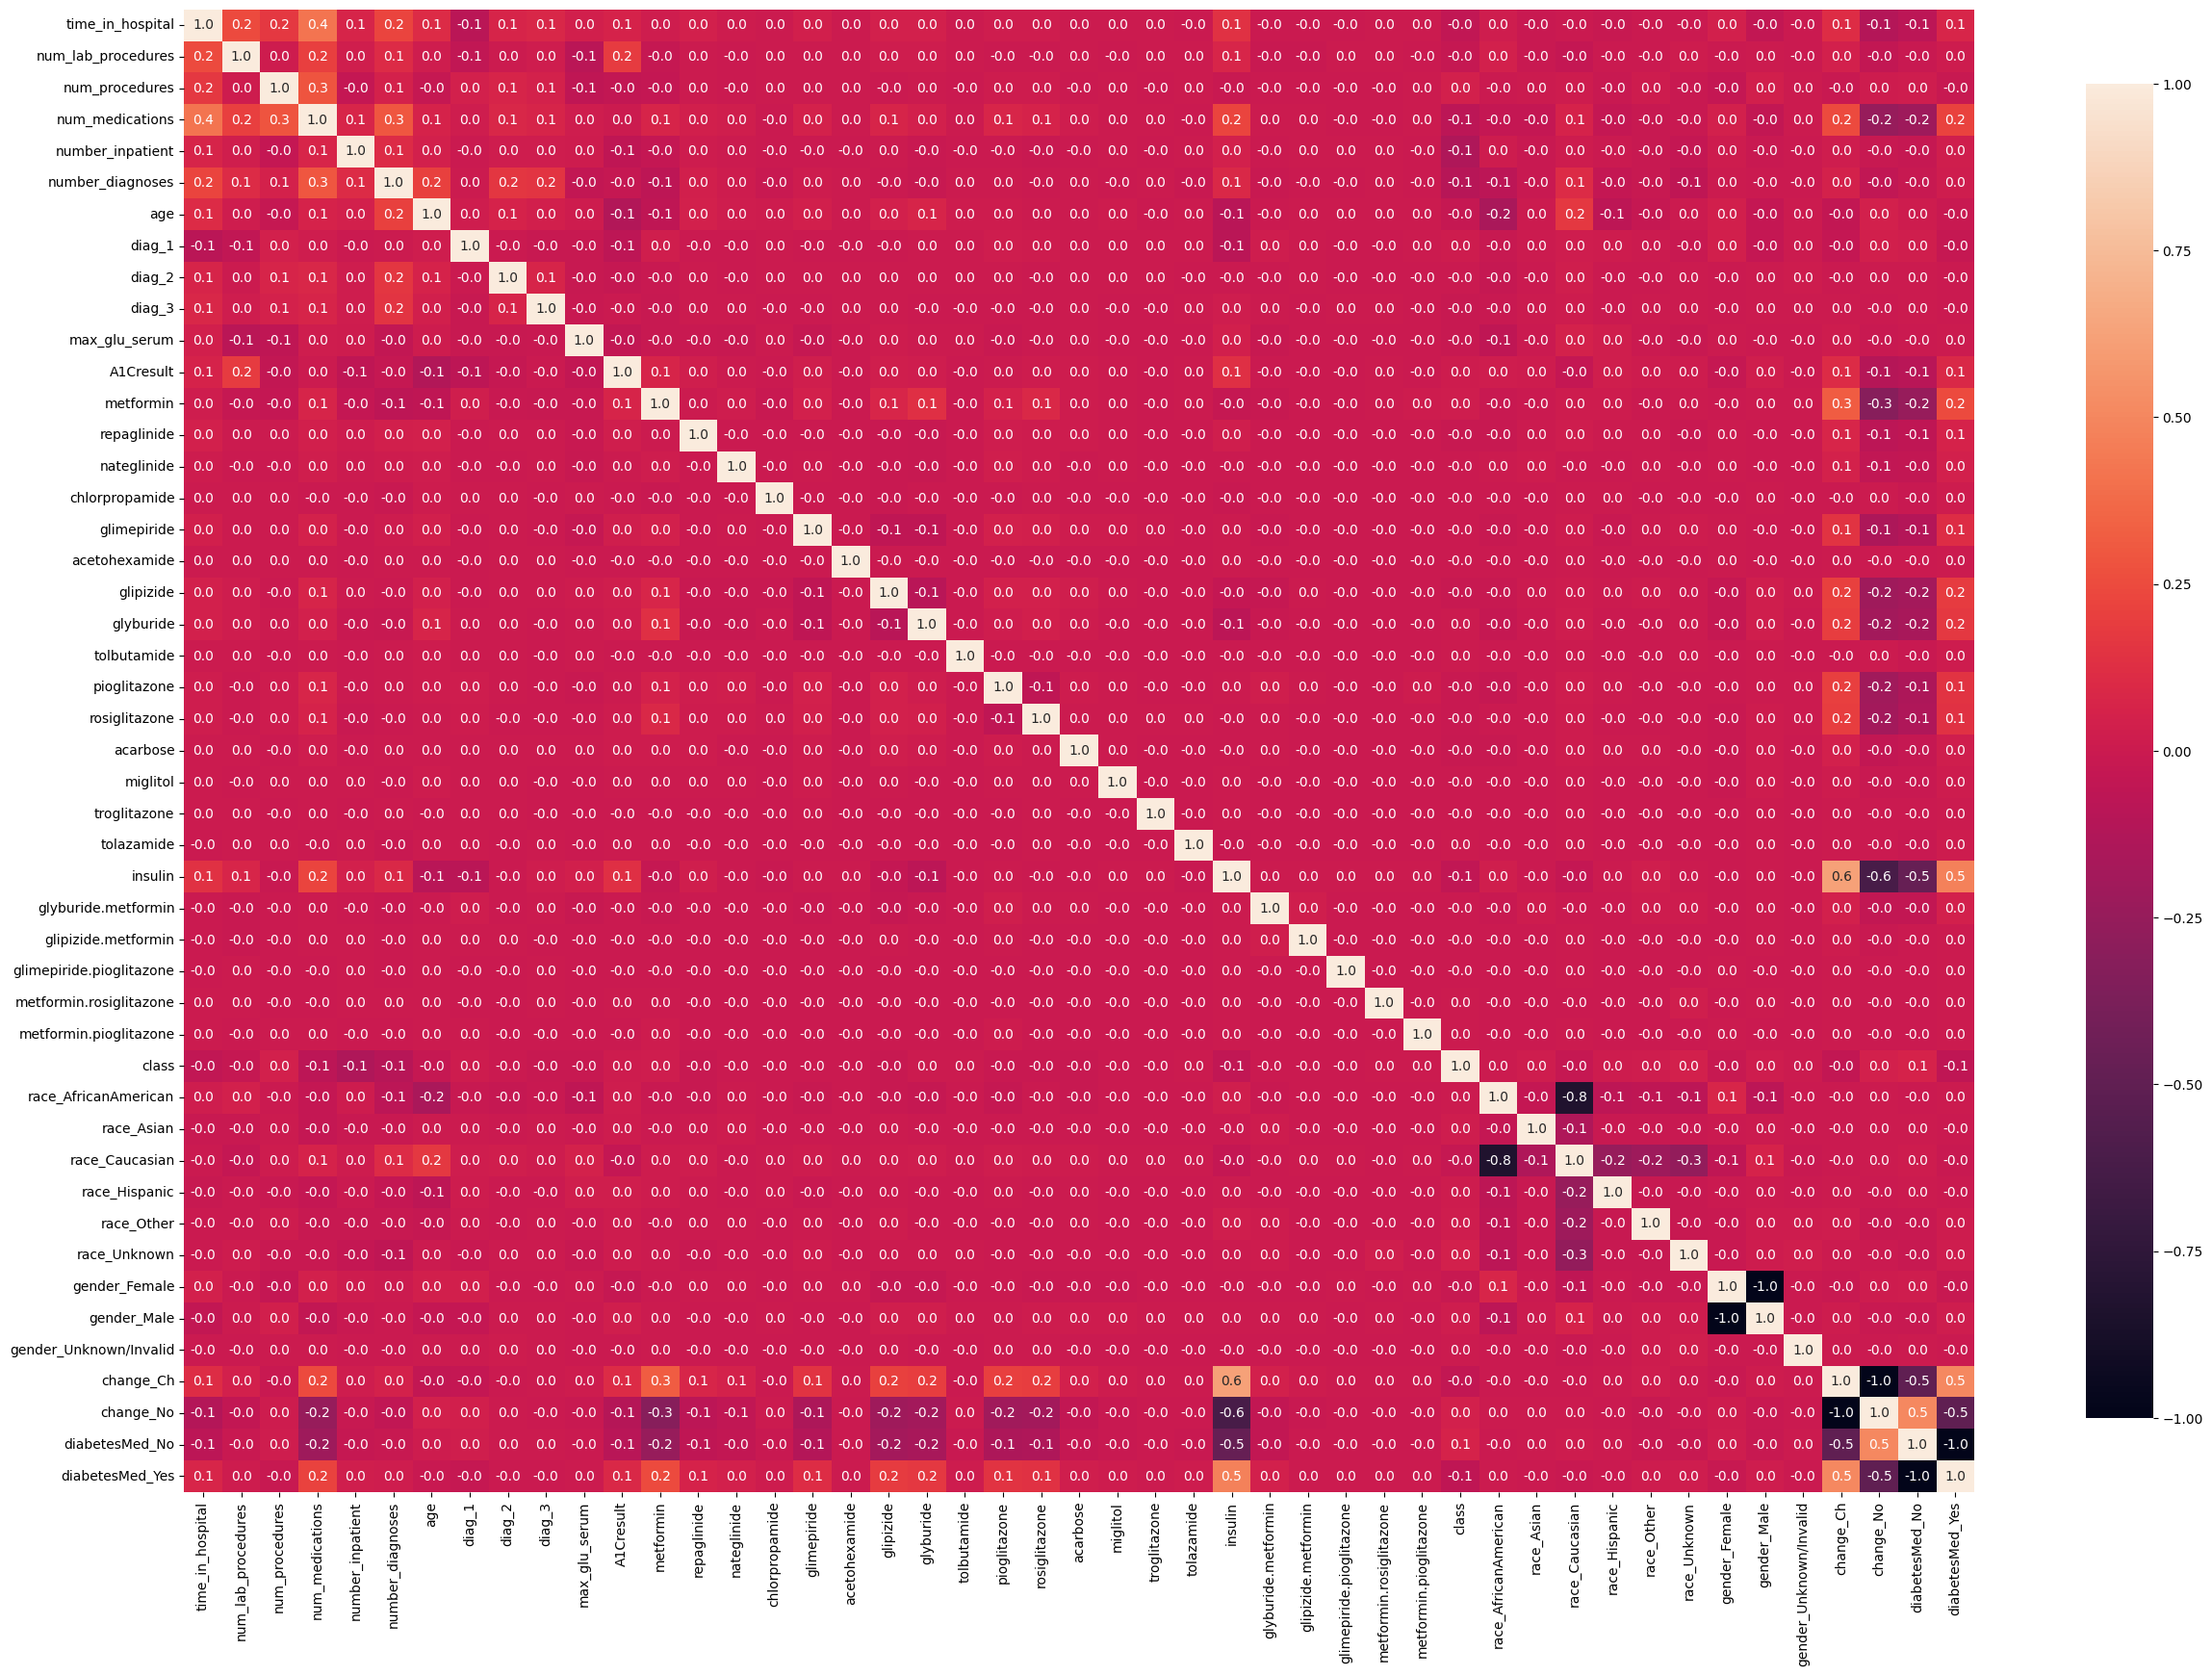

In [108]:
plt.figure(figsize=(30, 20))

sns.heatmap(
    df.corr(),
    cmap="rocket",
    annot=True,
    fmt=".1f", 
    annot_kws={"size":10},
    cbar_kws={"shrink":0.9}
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [136]:
train_df, temp_df = train_test_split(df, test_size=0.2)
test_df, validation_df = train_test_split(temp_df, test_size=0.1)

In [137]:
features = df.drop(columns=['class']).values
target = df['class'].values

In [138]:
feature_tensor = torch.tensor(features, dtype=torch.float32)
target_tensor = torch.tensor(target, dtype=torch.float32)
dataset = TensorDataset(feature_tensor, target_tensor)

In [153]:
# PARAMETER SETUP
batch_sz = 64
hidden_layer_sz = 128
learing_rate = 0.001
epochs = 30

In [154]:
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [155]:
class Network(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(Network, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_layer_size),
            nn.ReLU(),
            nn.Linear(hidden_layer_size, hidden_layer_size),
            nn.ReLU(),
            nn.Linear(hidden_layer_size, output_size)
        )

    def forward(self, x):
        return self.layers(x)

In [156]:
model = Network(input_size=46, hidden_layer_size=hidden_layer_sz, output_size=1)

In [157]:
criterion = nn.MSELoss()

In [158]:
optimizer = optim.Adam(model.parameters(), lr = learing_rate)

In [159]:
for epoch in range(epochs):
    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs.squeeze(), yb)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/30], Loss: 3.4589
Epoch [2/30], Loss: 1.2931
Epoch [3/30], Loss: 1.4357
Epoch [4/30], Loss: 0.8476
Epoch [5/30], Loss: 1.1602
Epoch [6/30], Loss: 0.8265
Epoch [7/30], Loss: 0.6853
Epoch [8/30], Loss: 0.8314
Epoch [9/30], Loss: 1.1965
Epoch [10/30], Loss: 0.7903
Epoch [11/30], Loss: 0.7735
Epoch [12/30], Loss: 0.6160
Epoch [13/30], Loss: 0.8972
Epoch [14/30], Loss: 0.7550
Epoch [15/30], Loss: 0.8441
Epoch [16/30], Loss: 0.9576
Epoch [17/30], Loss: 0.8025
Epoch [18/30], Loss: 1.0037
Epoch [19/30], Loss: 0.9439
Epoch [20/30], Loss: 1.1429
Epoch [21/30], Loss: 0.7876
Epoch [22/30], Loss: 0.2753
Epoch [23/30], Loss: 0.6431
Epoch [24/30], Loss: 0.5610
Epoch [25/30], Loss: 0.7388
Epoch [26/30], Loss: 0.5911
Epoch [27/30], Loss: 1.0957
Epoch [28/30], Loss: 0.7874
Epoch [29/30], Loss: 0.5080
Epoch [30/30], Loss: 0.8374
